In [42]:
# Import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Import the dataset
df = pd.read_csv('../../../QpiAI_iisc_siemens/August/CCData.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [44]:
# S1.3: Rename target column to a short label
df.rename(columns = {"default payment next month": "DEFAULT"}, inplace = True)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [45]:
# Get the percentage distribution of diagnonsis
print('Count of the clients whose default on the credit card payment\n', df['DEFAULT'].value_counts())
print('\n')
print('Percentage of the clients whose default on the credit card payment\n', df['DEFAULT'].value_counts(normalize=True)*100)

Count of the clients whose default on the credit card payment
 0    23364
1     6636
Name: DEFAULT, dtype: int64


Percentage of the clients whose default on the credit card payment
 0    77.88
1    22.12
Name: DEFAULT, dtype: float64


#### Class Imbalance

Due to huge difference between the count of target classes the dataset can be said as imbalanced dataset.

- The target label which consists of higher number of target datapoints is known as **majority class**
- The target label which consists of lower number of target datapoints is known as **minority class**

In [46]:
df.describe

<bound method NDFrame.describe of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...

In [47]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [48]:
# Remove misleading labels from education column.
df.loc[df['EDUCATION'] == 0, 'EDUCATION'] = 5
df.loc[df['EDUCATION'] == 6, 'EDUCATION'] = 5

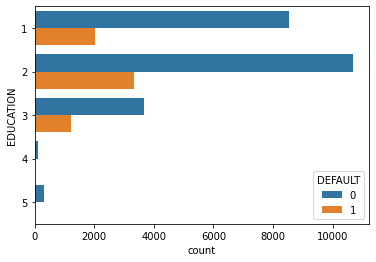

In [49]:
# Obtain a countplot to display the count of defaulters with respect to education
sns.countplot(y = 'EDUCATION', hue = 'DEFAULT', data = df)
plt.show()

# here highschool() has higest number of defaults

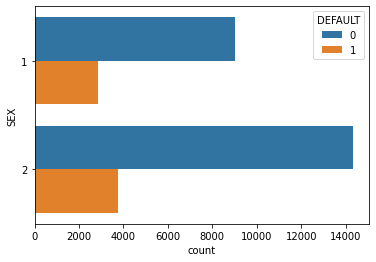

In [50]:
# Obtain a countplot to display the count of defaulters with respect to gender
sns.countplot(y = 'SEX', hue = 'DEFAULT', data = df)
plt.show()

In [51]:
# Remove misleading labels from marriage column.
df.loc[df['MARRIAGE'] == 0, 'MARRIAGE'] = 3

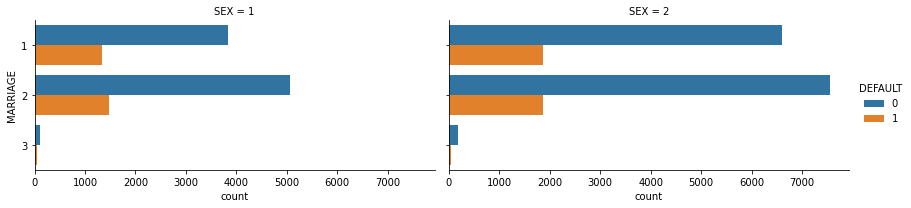

In [52]:
# Obtain a countplots to display to obtain count on the combined basis of gender and marraige status
sns.catplot(y="MARRIAGE", hue="DEFAULT", col="SEX", data=df, kind="count", height=3, aspect=2)
plt.show()

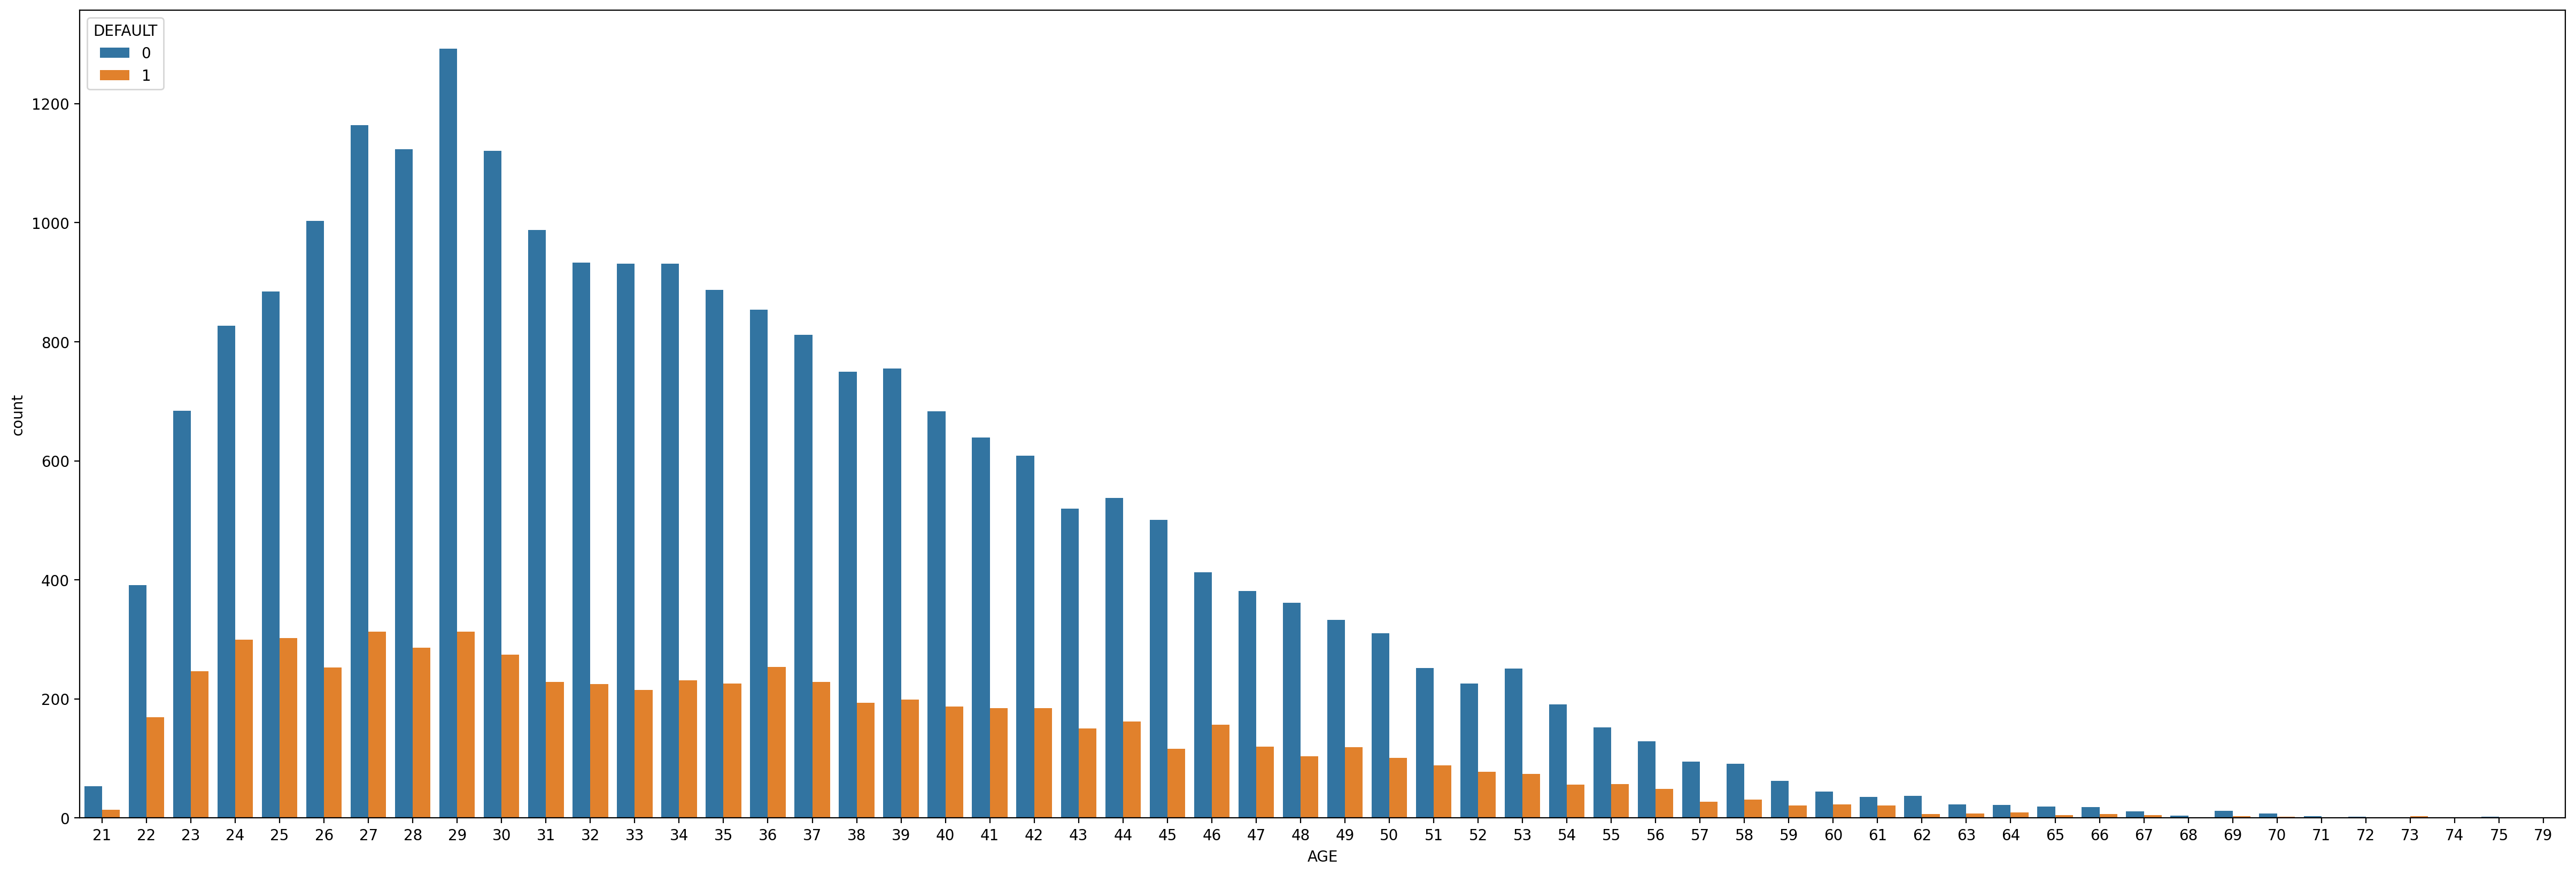

In [53]:
# Obtain a countplot to display the count of defaulters with respect to age
plt.figure(figsize = (30, 10), dpi=200)
sns.countplot(x = 'AGE', hue = 'DEFAULT', data = df)
plt.show()

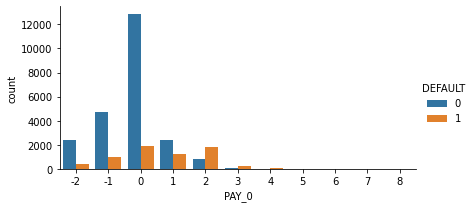

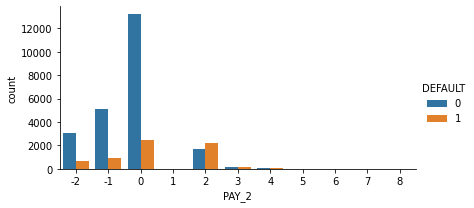

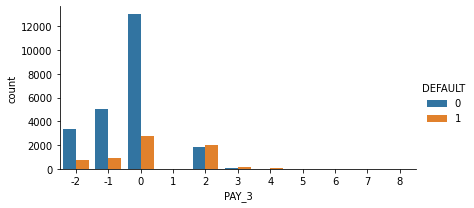

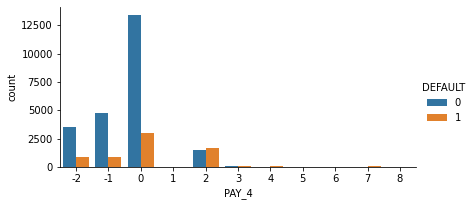

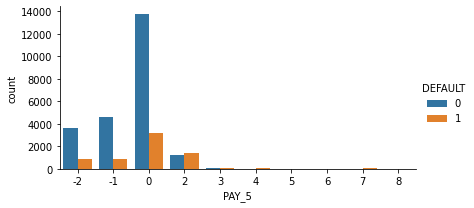

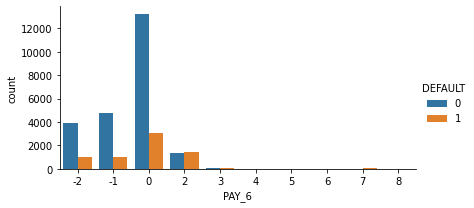

In [54]:
# Create a list for repayment status columns
repayment = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Obtain the display the count of defaulterswith respect to payment status 
for x in repayment:
    sns.catplot(x = x, kind = 'count', hue = 'DEFAULT', height = 3, aspect = 2, data = df)
plt.show()

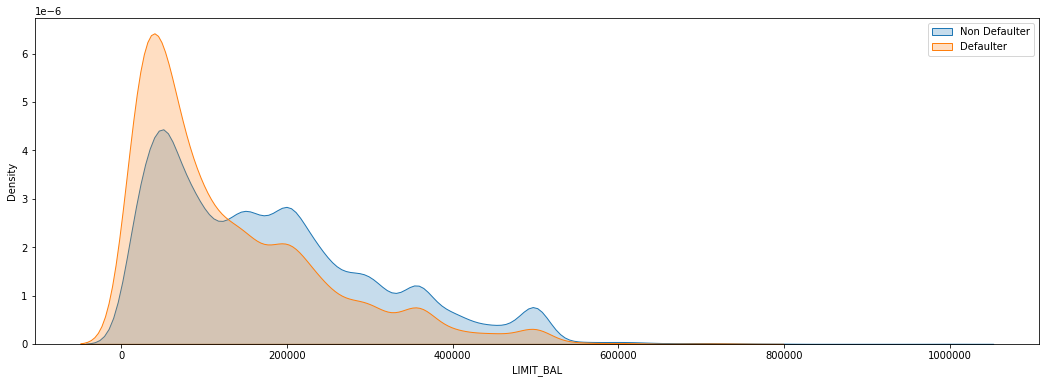

In [55]:
# Obtain the distribution of deafulters with respect to the bank approved credi limit
plt.figure(figsize=(18,6))
sns.kdeplot(df.loc[(df['DEFAULT'] == 0), 'LIMIT_BAL'], label = 'Non Defaulter', shade = True)
sns.kdeplot(df.loc[(df['DEFAULT'] == 1), 'LIMIT_BAL'], label = 'Defaulter', shade = True)
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.legend()
plt.show()

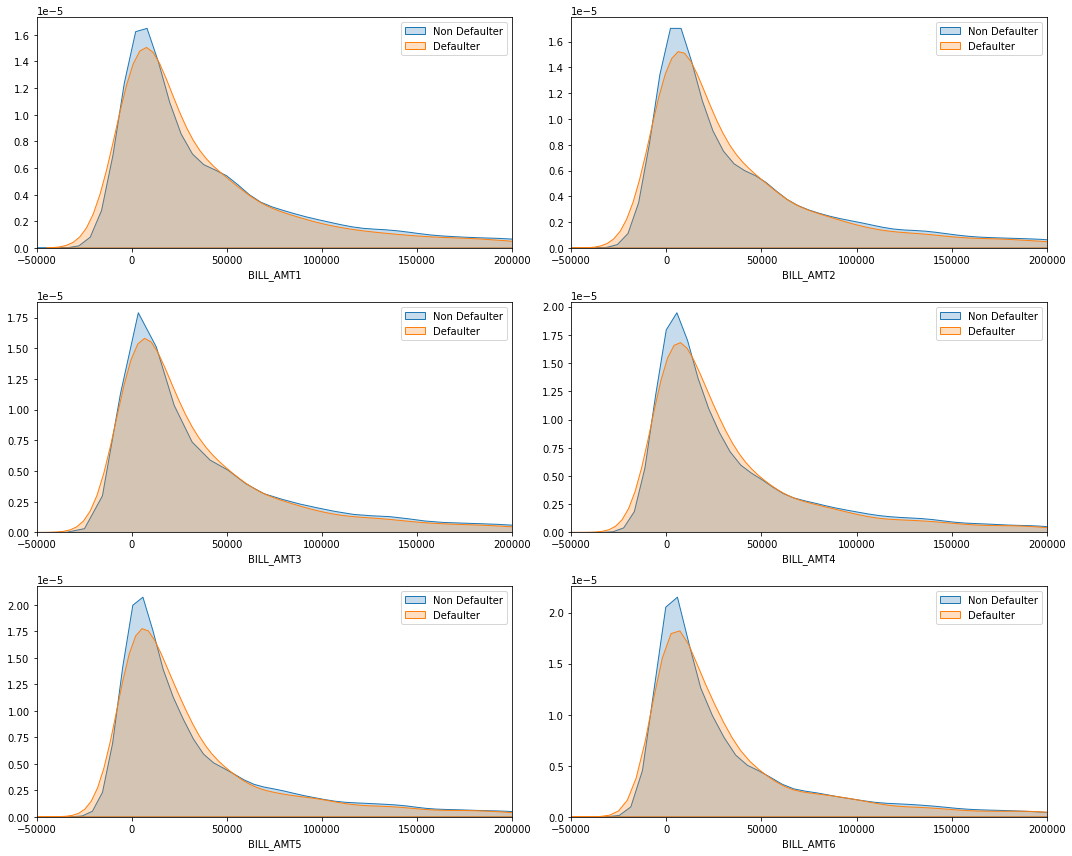

In [56]:
# Create a list for bill amount columns
bill_amt = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Obtain the distribution of deafulters with respect to the previous bills amount
plt.figure(figsize=(15,12))
for i,col in enumerate(bill_amt):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df.loc[(df['DEFAULT'] == 0), col], label = 'Non Defaulter', shade = True)
    sns.kdeplot(df.loc[(df['DEFAULT'] == 1), col], label = 'Defaulter', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

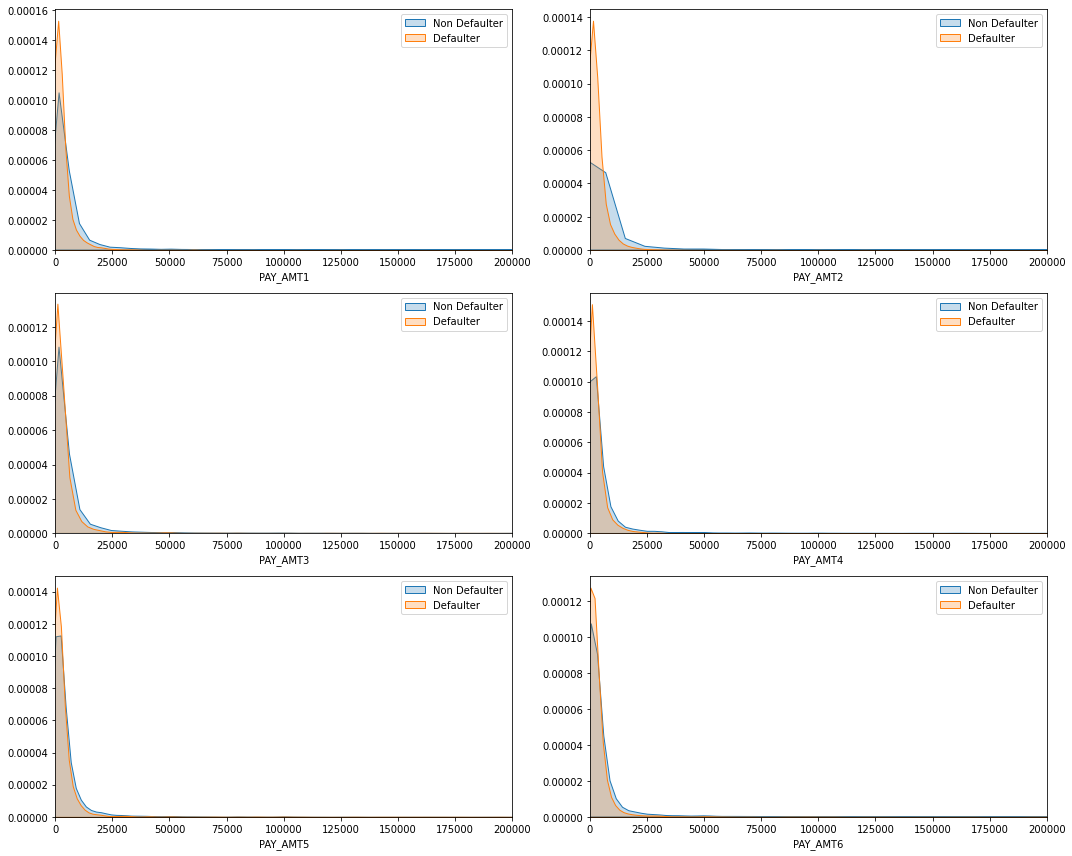

In [57]:
# Create a list for previous payment columns
pay_amt = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Obtain the distribution of deafulters with respect to the previous payments amount
plt.figure(figsize=(15,12))
for i,col in enumerate(pay_amt):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df.loc[(df['DEFAULT'] == 0), col], label = 'Non Defaulter', shade = True)
    sns.kdeplot(df.loc[(df['DEFAULT'] == 1), col], label = 'Defaulter', shade = True)
    plt.xlim(0,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [58]:
# Create sepaate DataFrames for features and target label
X = df.drop(['DEFAULT', 'ID'],axis=1)
y = df['DEFAULT']

<AxesSubplot:title={'center':'Correlation with Default'}>

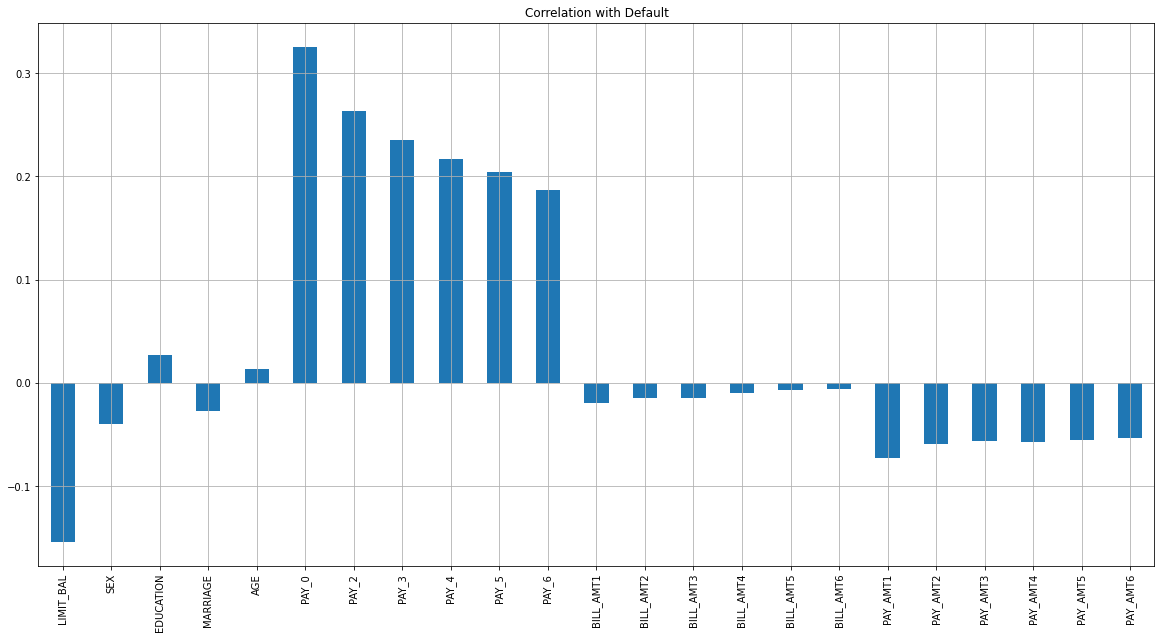

In [59]:
# Obtain the correlation of various features with the target label
df_corr = X.corrwith(df['DEFAULT'])
df_corr.plot.bar(figsize = (20, 10), title = "Correlation with Default", grid = True)

In [60]:
# Create the feature and target dataset for training and testing the model.

# Import the required libraries 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier    
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

# Modeling a decision tree.
dtree_clf = DecisionTreeClassifier(random_state = 20)
dtree_clf.fit(X_train, y_train)
y_train_pred = dtree_clf.predict(X_train)
y_test_pred = dtree_clf.predict(X_test)

# Print the classifier performance scores
print(f"Accuracy on the train set: {metrics.accuracy_score(y_train, y_train_pred):.4f}\n")
print(f"Accuracy on the test set: {metrics.accuracy_score(y_test, y_test_pred):.4f}")

Accuracy on the train set: 0.9995

Accuracy on the test set: 0.7250


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16300
           1       1.00      1.00      1.00      4700

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



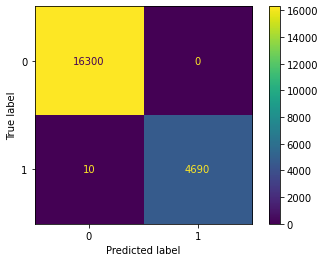

In [61]:
# Obtain classification report for the train set

plot_confusion_matrix(dtree_clf, X_train, y_train, values_format = 'd')
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      7064
           1       0.38      0.42      0.40      1936

    accuracy                           0.73      9000
   macro avg       0.61      0.62      0.61      9000
weighted avg       0.74      0.72      0.73      9000



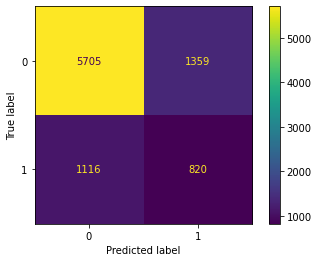

In [62]:
# Obtain classification report for the test set
plot_confusion_matrix(dtree_clf, X_test, y_test, values_format = 'd')
print(classification_report(y_test, y_test_pred))

Here, we observe a steep degradation in the classifier performance. This is due to following reasons:

1. Imbalance dataset.
2. Model has not been optimized.
3. Overfitting of the model on the train datapoints.

To rectify these issues, we will:

1. Balance the dataset for majority and minority classes.
2. Tune the hyperparameters.
3. Apply cross-validation in order to obtain robust model performance.

In [63]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 30)
X_dn, y_dn = rus.fit_resample(X, y)

print("Non-Defaulter datapoints: ", np.sum(y_dn == 0))
print("Defaulter datapoints: ", np.sum(y_dn == 1))

Non-Defaulter datapoints:  6636
Defaulter datapoints:  6636


Oversampling
In undersampling we will increase the number of minority samples by creating multiple copies of the datapoints such that the number of samples in both classes become equal.

In [64]:
# Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 30)
X_up, y_up = ros.fit_resample(X, y)

print("Non-Defaulter datapoints: ", np.sum(y_up == 0))
print("Defaulter datapoints: ", np.sum(y_up == 1))

Non-Defaulter datapoints:  23364
Defaulter datapoints:  23364


# SMOTE - SYnthetic Minority Oversampling Technique

In [65]:
# Smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X, y)

print("Non-Defaulter datapoints: ", np.sum(y_smote == 0))
print("Defaulter datapoints: ", np.sum(y_smote == 1))

Non-Defaulter datapoints:  23364
Defaulter datapoints:  23364


In [138]:
# Import the required packages 
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Perform the train-test split on the UpScaled
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, random_state=42)

#Perform the train-test split on the DownScaled
X_train_dn, X_test_dn, y_train_dn, y_test_dn = train_test_split(X_dn, y_dn, random_state=42)

#Perform the train-test split on the Smote
X_train_smot, X_test_smot, y_train_smot, y_test_smot = train_test_split(X_smote, y_smote, random_state=42)


# Logistic Regression

In [139]:
# Define the parameter grid and fit the model
param_grid = {'logisticregression__C': [1, 10, 50, 100]}
model_lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Use AUC score as parameter
grid_lr = GridSearchCV(model_lr, param_grid=param_grid, scoring=["roc_auc", 'average_precision', 'accuracy'],refit='roc_auc')
grid_lr.fit(X_train_dn, y_train_dn)

best_lr_dn = grid_lr.best_params_
best_lr_dn = grid_lr.best_estimator_
print(best_lr_dn)

# Obtain the performance scores
#print("Cross-validated best score {}%".format(round(grid_lr.best_score_ * 100, 3)))
predictions = best_lr_dn.predict(X_test_dn)
#print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_dn, y_pred = predictions) * 100, 3)))

# Store and append the classifier performance metrics to the results DataFrame
results_df = pd.DataFrame(
    data=[["LR DownSample ", accuracy_score(y_test_dn, predictions),
           metrics.precision_score(y_test_dn, predictions),
           metrics.recall_score(y_test_dn, predictions), 
           metrics.f1_score(y_test_dn, predictions), grid_lr.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])


print(results_df)
 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=50, max_iter=1000))])
            Model  Accuracy  Precision    Recall  F1 Score        CV
0  LR DownSample   0.661242   0.660074  0.650426  0.655215  0.723674


In [140]:
# Define the parameter grid and fit the model
param_grid = {'logisticregression__C': [1, 10, 50, 100]}
model_lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Use AUC score as parameter
grid_lr = GridSearchCV(model_lr, param_grid=param_grid, scoring=["roc_auc", 'average_precision', 'accuracy'],refit='roc_auc')
grid_lr.fit(X_train_up, y_train_up)
best_lr_up = grid_lr.best_params_
best_lr_up = grid_lr.best_estimator_
print(best_lr_up)

# Obtain the performance scores
#print("Cross-validated best score {}%".format(round(grid_lr.best_score_ * 100, 3)))
predictions = best_lr_up.predict(X_test_up)
#print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_up, y_pred = predictions) * 100, 3)))

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["LR Up-Sample ", accuracy_score(y_test_up, predictions),
           metrics.precision_score(y_test_up, predictions),
           metrics.recall_score(y_test_up, predictions), 
           metrics.f1_score(y_test_up, predictions), grid_lr.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=50, max_iter=1000))])
            Model  Accuracy  Precision    Recall  F1 Score        CV
0  LR DownSample   0.661242   0.660074  0.650426  0.655215  0.723674
1   LR Up-Sample   0.667351   0.679629  0.637899  0.658103  0.724603


In [141]:
# Define the parameter grid and fit the model
param_grid = {'logisticregression__C': [1, 10, 50, 100]}
model_lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Use AUC score as parameter
grid_lr = GridSearchCV(model_lr, param_grid=param_grid, scoring=["roc_auc", 'average_precision', 'accuracy'],refit='roc_auc')
grid_lr.fit(X_train_smot, y_train_smot)
best_lr_smot = grid_lr.best_params_
best_lr_smot = grid_lr.best_estimator_
print(best_lr_smot)

# Obtain the performance scores
#print("Cross-validated best score {}%".format(round(grid_lr.best_score_ * 100, 3)))
predictions = best_lr_smot.predict(X_test_smot)
#print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_up, y_pred = predictions) * 100, 3)))

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["LR SMOT-Sample ", accuracy_score(y_test_smot, predictions),
           metrics.precision_score(y_test_smot, predictions),
           metrics.recall_score(y_test_smot, predictions), 
           metrics.f1_score(y_test_smot, predictions), grid_lr.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1, max_iter=1000))])
             Model  Accuracy  Precision    Recall  F1 Score        CV
0   LR DownSample   0.661242   0.660074  0.650426  0.655215  0.723674
1    LR Up-Sample   0.667351   0.679629  0.637899  0.658103  0.724603
2  LR SMOT-Sample   0.718798   0.721935  0.715163  0.718533  0.793072


## Precision Recall Curve:
The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).


In [142]:
# # Obtain the predicted labels for the test dataset
# y_pred= best_lr.predict(X_test)
# pr_log = plot_precision_recall_curve(best_lr, X_test, y_test)

# # Obtain the precision recall curve and confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
# plt.title("Logistic Regression-up Sample", fontweight= "bold")
# plt.show()

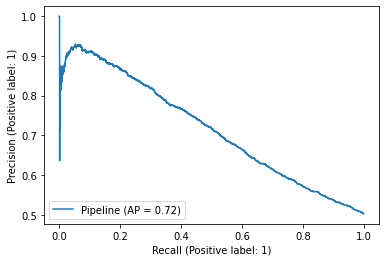

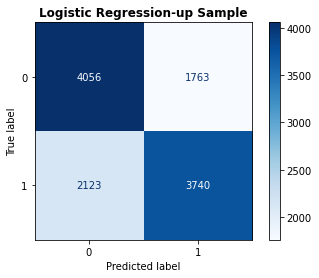

In [143]:
# Obtain the predicted labels for the test dataset
y_pred= best_lr_up.predict(X_test_up)
pr_log = plot_precision_recall_curve(best_lr, X_test_up, y_test_up)

# Obtain the precision recall curve and confusion matrix
cm = confusion_matrix(y_test_up, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Logistic Regression-up Sample", fontweight= "bold")
plt.show()

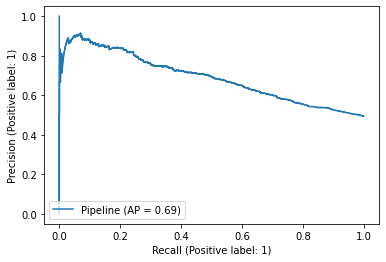

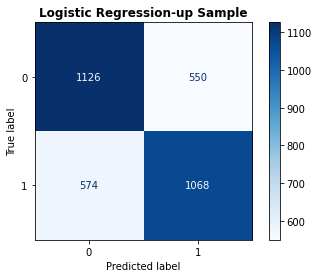

In [144]:
# Obtain the predicted labels for the test dataset
y_pred= best_lr_dn.predict(X_test_dn)
pr_log = plot_precision_recall_curve(best_lr, X_test_dn, y_test_dn)

# Obtain the precision recall curve and confusion matrix
cm = confusion_matrix(y_test_dn, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Logistic Regression-up Sample", fontweight= "bold")
plt.show()

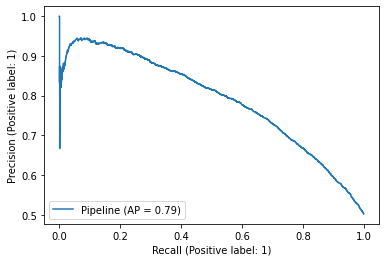

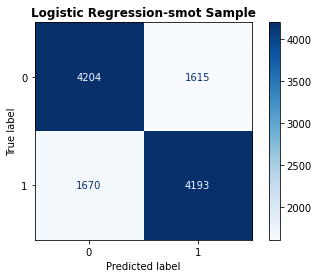

In [145]:
# Obtain the predicted labels for the test dataset
y_pred= best_lr_smot.predict(X_test_smot)
pr_log = plot_precision_recall_curve(best_lr, X_test_smot, y_test_smot)

# Obtain the precision recall curve and confusion matrix
cm = confusion_matrix(y_test_smot, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Logistic Regression-smot Sample", fontweight= "bold")
plt.show()

# KNN

In [146]:
# Define the parameter grid and fit the model
param_grid = {'kneighborsclassifier__n_neighbors': range(2,10)}
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
grid_knn = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', verbose = 3)
grid_knn.fit(X_train_smot, y_train_smot)
best_knn_smot = grid_knn.best_estimator_
print(best_knn_smot)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_knn.best_score_ * 100, 3)))
predictions = best_knn_smot.predict(X_test_smot)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_smot, y_pred = predictions) * 100, 3)))

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["KNN SMOT-Sample ", accuracy_score(y_test_smot, predictions),
           metrics.precision_score(y_test_smot, predictions),
           metrics.recall_score(y_test_smot, predictions), 
           metrics.f1_score(y_test_smot, predictions), grid_knn.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END kneighborsclassifier__n_neighbors=2;, score=0.794 total time=   1.1s
[CV 2/5] END kneighborsclassifier__n_neighbors=2;, score=0.798 total time=   0.9s
[CV 3/5] END kneighborsclassifier__n_neighbors=2;, score=0.793 total time=   1.2s
[CV 4/5] END kneighborsclassifier__n_neighbors=2;, score=0.793 total time=   1.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=2;, score=0.789 total time=   1.2s
[CV 1/5] END kneighborsclassifier__n_neighbors=3;, score=0.805 total time=   0.9s
[CV 2/5] END kneighborsclassifier__n_neighbors=3;, score=0.813 total time=   1.1s
[CV 3/5] END kneighborsclassifier__n_neighbors=3;, score=0.807 total time=   1.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=3;, score=0.808 total time=   1.1s
[CV 5/5] END kneighborsclassifier__n_neighbors=3;, score=0.803 total time=   0.9s
[CV 1/5] END kneighborsclassifier__n_neighbors=4;, score=0.808 total time=   1.1s
[CV 2/5] END kneighborsclassifier__n_n

In [147]:
# Define the parameter grid and fit the model
param_grid = {'kneighborsclassifier__n_neighbors': range(2,10)}
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
grid_knn = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', verbose = 3)
grid_knn.fit(X_train_up, y_train_up)
best_knn_up = grid_knn.best_estimator_
print(best_knn_up)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_knn.best_score_ * 100, 3)))
predictions = best_knn_up.predict(X_test_up)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_up, y_pred = predictions) * 100, 3)))

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["KNN up-Sample ", accuracy_score(y_test_up, predictions),
           metrics.precision_score(y_test_up, predictions),
           metrics.recall_score(y_test_up, predictions), 
           metrics.f1_score(y_test_up, predictions), grid_knn.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END kneighborsclassifier__n_neighbors=2;, score=0.844 total time=   1.3s
[CV 2/5] END kneighborsclassifier__n_neighbors=2;, score=0.849 total time=   1.2s
[CV 3/5] END kneighborsclassifier__n_neighbors=2;, score=0.848 total time=   1.3s
[CV 4/5] END kneighborsclassifier__n_neighbors=2;, score=0.841 total time=   1.1s
[CV 5/5] END kneighborsclassifier__n_neighbors=2;, score=0.847 total time=   1.3s
[CV 1/5] END kneighborsclassifier__n_neighbors=3;, score=0.832 total time=   1.4s
[CV 2/5] END kneighborsclassifier__n_neighbors=3;, score=0.834 total time=   1.6s
[CV 3/5] END kneighborsclassifier__n_neighbors=3;, score=0.834 total time=   1.9s
[CV 4/5] END kneighborsclassifier__n_neighbors=3;, score=0.827 total time=   1.7s
[CV 5/5] END kneighborsclassifier__n_neighbors=3;, score=0.837 total time=   1.7s
[CV 1/5] END kneighborsclassifier__n_neighbors=4;, score=0.819 total time=   1.7s
[CV 2/5] END kneighborsclassifier__n_n

In [148]:
# Define the parameter grid and fit the model
param_grid = {'kneighborsclassifier__n_neighbors': range(2,10)}
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
grid_knn = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', verbose = 3)
grid_knn.fit(X_train_dn, y_train_dn)
best_knn_dn = grid_knn.best_estimator_
print(best_knn_dn)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_knn.best_score_ * 100, 3)))
predictions = best_knn_dn.predict(X_test_dn)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_dn, y_pred = predictions) * 100, 3)))

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["KNN dn-Sample ", accuracy_score(y_test_dn, predictions),
           metrics.precision_score(y_test_dn, predictions),
           metrics.recall_score(y_test_dn, predictions), 
           metrics.f1_score(y_test_dn, predictions), grid_knn.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END kneighborsclassifier__n_neighbors=2;, score=0.664 total time=   0.3s
[CV 2/5] END kneighborsclassifier__n_neighbors=2;, score=0.674 total time=   0.2s
[CV 3/5] END kneighborsclassifier__n_neighbors=2;, score=0.675 total time=   0.2s
[CV 4/5] END kneighborsclassifier__n_neighbors=2;, score=0.652 total time=   0.2s
[CV 5/5] END kneighborsclassifier__n_neighbors=2;, score=0.653 total time=   0.1s
[CV 1/5] END kneighborsclassifier__n_neighbors=3;, score=0.684 total time=   0.2s
[CV 2/5] END kneighborsclassifier__n_neighbors=3;, score=0.690 total time=   0.2s
[CV 3/5] END kneighborsclassifier__n_neighbors=3;, score=0.697 total time=   0.2s
[CV 4/5] END kneighborsclassifier__n_neighbors=3;, score=0.672 total time=   0.2s
[CV 5/5] END kneighborsclassifier__n_neighbors=3;, score=0.674 total time=   0.2s
[CV 1/5] END kneighborsclassifier__n_neighbors=4;, score=0.694 total time=   0.2s
[CV 2/5] END kneighborsclassifier__n_n

In [149]:
print(results_df)

              Model  Accuracy  Precision    Recall  F1 Score        CV
0    LR DownSample   0.661242   0.660074  0.650426  0.655215  0.723674
1     LR Up-Sample   0.667351   0.679629  0.637899  0.658103  0.724603
2   LR SMOT-Sample   0.718798   0.721935  0.715163  0.718533  0.793072
3  KNN SMOT-Sample   0.750728   0.751149  0.752686  0.751917  0.825149
4    KNN up-Sample   0.829396   0.826417  0.835579  0.830973  0.845919
5    KNN dn-Sample   0.672092   0.688179  0.616931  0.650610  0.726974


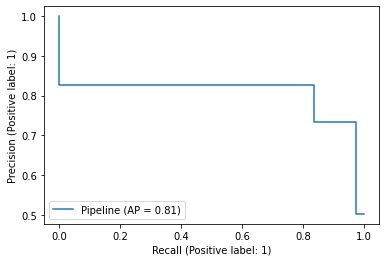

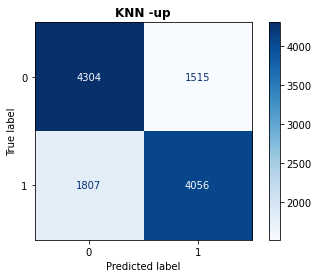

In [150]:
# Obtain the predicted labels for the test dataset
y_pred= best_knn.predict(X_test_up)
pr_log = plot_precision_recall_curve(best_knn_up, X_test_up, y_test_up)

# Obtain the precision recall curve and confusion matrix
cm = confusion_matrix(y_test_up, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("KNN -up", fontweight= "bold")
plt.show()

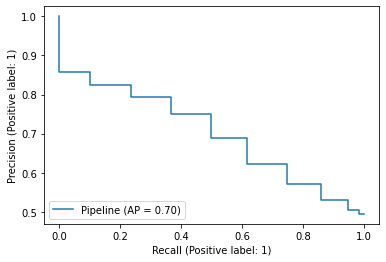

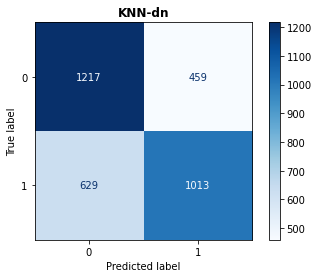

In [151]:
# Obtain the predicted labels for the test dataset
y_pred= best_knn_dn.predict(X_test_dn)
pr_log = plot_precision_recall_curve(best_knn_dn, X_test_dn, y_test_dn)

# Obtain the precision recall curve and confusion matrix
cm = confusion_matrix(y_test_dn, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("KNN-dn", fontweight= "bold")
plt.show()

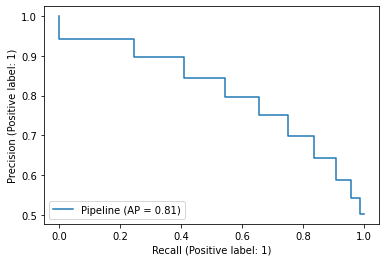

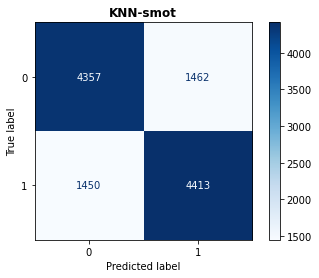

In [152]:
# Obtain the predicted labels for the test dataset
y_pred= best_knn_smot.predict(X_test_smot)
pr_log = plot_precision_recall_curve(best_knn_smot, X_test_smot, y_test_smot)

# Obtain the precision recall curve and confusion matrix
cm = confusion_matrix(y_test_smot, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("KNN-smot", fontweight= "bold")
plt.show()

# SVC

In [153]:
# Import the required packages
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid and fit the model
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
param_grid = {'svm__C': [0.1, 1, 10], 'svm__gamma': [0.1, 1, 10]}
grid_svc = GridSearchCV(pipe, param_grid=param_grid, n_jobs = -1)
grid_svc.fit(X_train_dn, y_train_dn)
best_svc= grid_svc.best_estimator_
print(best_svc)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_svc.best_score_ * 100, 3)))
predictions = best_svc.predict(X_test_dn)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_dn, y_pred = predictions) * 100, 3)))

KeyboardInterrupt: 

In [ ]:
# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["SVC dn-Sample ", accuracy_score(y_test_dn, predictions),
           metrics.precision_score(y_test_dn, predictions),
           metrics.recall_score(y_test_dn, predictions), 
           metrics.f1_score(y_test_dn, predictions), grid_svc.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

              Model  Accuracy  Precision    Recall  F1 Score        CV
0    LR DownSample   0.661242   0.660074  0.650426  0.655215  0.723674
1     LR Up-Sample   0.667351   0.679629  0.637899  0.658103  0.724603
2   LR SMOT-Sample   0.718798   0.721935  0.715163  0.718533  0.793072
3  KNN SMOT-Sample   0.750728   0.751149  0.752686  0.751917  0.825149
4    KNN up-Sample   0.829396   0.826417  0.835579  0.830973  0.845919
5    KNN dn-Sample   0.672092   0.688179  0.616931  0.650610  0.726974
6    SVC dn-Sample   0.694696   0.737717  0.594397  0.658347  0.699015


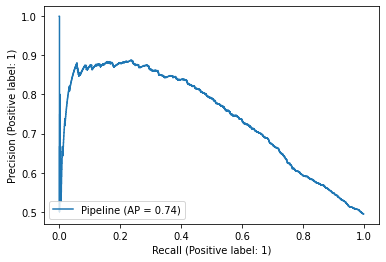

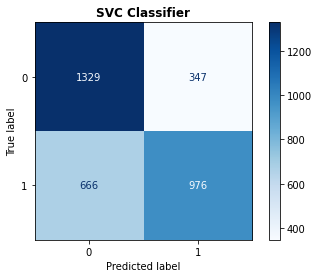

In [ ]:
# Obtain the predicted labels for the test dataset
y_pred= best_svc.predict(X_test_dn)
pr_svc = plot_precision_recall_curve(best_svc, X_test_dn, y_test_dn)

# Obtain the precision recall curve and confusion matrix
cm = confusion_matrix(y_test_dn, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("SVC Classifier", fontweight= "bold")
plt.show()

In [ ]:
# SVC - UP Sample

# Import the required packages
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid and fit the model
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
param_grid = {'svm__C': [0.1, 1, 10], 'svm__gamma': [0.1, 1, 10]}
grid_svc = GridSearchCV(pipe, param_grid=param_grid, n_jobs = -1)
grid_svc.fit(X_train_up, y_train_up)
best_svc= grid_svc.best_estimator_
print(best_svc)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_svc.best_score_ * 100, 3)))
predictions = best_svc.predict(X_test_up)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_up, y_pred = predictions) * 100, 3)))


# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["SVC up-Sample ", accuracy_score(y_test_up, predictions),
           metrics.precision_score(y_test_up, predictions),
           metrics.recall_score(y_test_up, predictions), 
           metrics.f1_score(y_test_up, predictions), grid_svc.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)


# Obtain the predicted labels for the test dataset
y_pred= best_svc.predict(X_test_up)
pr_svc = plot_precision_recall_curve(best_svc, X_test_up, y_test_up)

# Obtain the precision recall curve and confusion matrix
cm = confusion_matrix(y_test_up, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("SVC UPClassifier", fontweight= "bold")
plt.show()

KeyboardInterrupt: 

# SVC - SMOTE Sample

In [ ]:
# SVC - DOWN Sample

 

# Define the parameter grid and fit the model
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
param_grid = {'svm__C': [0.1, 1, 10], 'svm__gamma': [0.1, 1, 10]}
grid_svc = GridSearchCV(pipe, param_grid=param_grid, n_jobs = -1)
grid_svc.fit(X_train_smot, y_train_smot)
best_svc= grid_svc.best_estimator_
print(best_svc)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_svc.best_score_ * 100, 3)))
predictions = best_svc.predict(X_test_smot)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_smot, y_pred = predictions) * 100, 3)))


# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["SVC smot-Sample ", accuracy_score(y_test_smot, predictions),
           metrics.precision_score(y_test_smot, predictions),
           metrics.recall_score(y_test_smot, predictions), 
           metrics.f1_score(y_test_smot, predictions), grid_svc.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)


# Obtain the predicted labels for the test dataset
y_pred= best_svc.predict(X_test_smot)
pr_svc = plot_precision_recall_curve(best_svc, X_test_smot, y_test_smot)

# Obtain the precision recall curve and confusion matrix
cm = confusion_matrix(y_test_smot, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("SVC SMOT Classifier", fontweight= "bold")
plt.show()

# Decision Tree - DN

In [154]:
# Define the parameter grid and fit the model
param_grid = {'criterion':['gini','entropy'], 'max_depth': np.arange(4,11), 'random_state': [42]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1)
grid_tree.fit(X_train_dn, y_train_dn)
best_tree = grid_tree.best_estimator_
print(best_tree)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_tree.best_score_ * 100, 3)))
predictions = best_tree.predict(X_test_dn)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_dn, y_pred = predictions) * 100, 3)))

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
Cross-validated best score 75.051%
Test score: 76.603%


In [155]:
# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["DT dn-Sample ", accuracy_score(y_test_dn, predictions),
           metrics.precision_score(y_test_dn, predictions),
           metrics.recall_score(y_test_dn, predictions), 
           metrics.f1_score(y_test_dn, predictions), grid_tree.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

              Model  Accuracy  Precision    Recall  F1 Score        CV
0    LR DownSample   0.661242   0.660074  0.650426  0.655215  0.723674
1     LR Up-Sample   0.667351   0.679629  0.637899  0.658103  0.724603
2   LR SMOT-Sample   0.718798   0.721935  0.715163  0.718533  0.793072
3  KNN SMOT-Sample   0.750728   0.751149  0.752686  0.751917  0.825149
4    KNN up-Sample   0.829396   0.826417  0.835579  0.830973  0.845919
5    KNN dn-Sample   0.672092   0.688179  0.616931  0.650610  0.726974
6     DT dn-Sample   0.690175   0.766031  0.538368  0.632332  0.750513


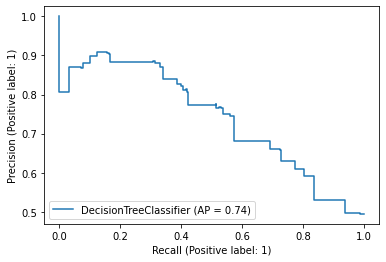

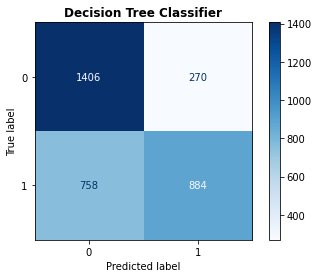

In [156]:
# Obtain the predicted labels for the test dataset
y_pred= best_tree.predict(X_test_dn)
pr_log = plot_precision_recall_curve(best_tree, X_test_dn, y_test_dn)

# Obtain the precision recall curve and confusion matrix
cm = confusion_matrix(y_test_dn, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Decision Tree Classifier", fontweight= "bold")
plt.show()

# DN - up

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
Cross-validated best score 79.467%
Test score: 76.079%


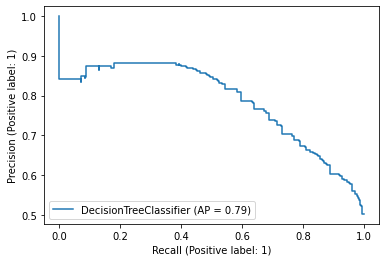

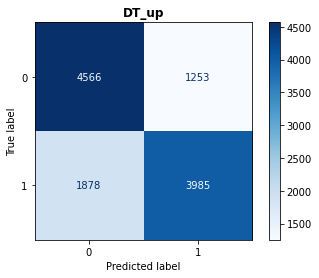

              Model  Accuracy  Precision    Recall  F1 Score        CV
0    LR DownSample   0.661242   0.660074  0.650426  0.655215  0.723674
1     LR Up-Sample   0.667351   0.679629  0.637899  0.658103  0.724603
2   LR SMOT-Sample   0.718798   0.721935  0.715163  0.718533  0.793072
3  KNN SMOT-Sample   0.750728   0.751149  0.752686  0.751917  0.825149
4    KNN up-Sample   0.829396   0.826417  0.835579  0.830973  0.845919
5    KNN dn-Sample   0.672092   0.688179  0.616931  0.650610  0.726974
6     DT dn-Sample   0.690175   0.766031  0.538368  0.632332  0.750513
7     DT up-Sample   0.731981   0.760787  0.679686  0.717953  0.794673


In [157]:
# Define the parameter grid and fit the model
param_grid = {'criterion':['gini','entropy'], 'max_depth': np.arange(4,11), 'random_state': [42]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1)
grid_tree.fit(X_train_up, y_train_up)
best_tree = grid_tree.best_estimator_
print(best_tree)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_tree.best_score_ * 100, 3)))
predictions = best_tree.predict(X_test_up)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_up, y_pred = predictions) * 100, 3)))


# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["DT up-Sample ", accuracy_score(y_test_up, predictions),
           metrics.precision_score(y_test_up, predictions),
           metrics.recall_score(y_test_up, predictions), 
           metrics.f1_score(y_test_up, predictions), grid_tree.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)


# Obtain the predicted labels for the test dataset
y_pred= best_tree.predict(X_test_up)
pr_log = plot_precision_recall_curve(best_tree, X_test_up, y_test_up)

# Obtain the precision recall curve and confusion matrix
cm = confusion_matrix(y_test_up, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("DT_up", fontweight= "bold")
plt.show()
print(results_df)

# DN- SMOT

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)
Cross-validated best score 81.912%
Test score: 76.431%


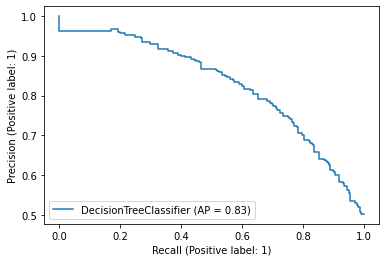

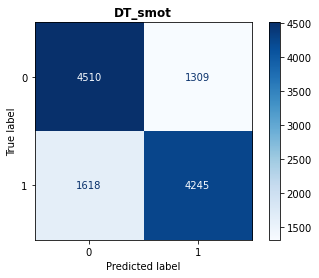

              Model  Accuracy  Precision    Recall  F1 Score        CV
0    LR DownSample   0.661242   0.660074  0.650426  0.655215  0.723674
1     LR Up-Sample   0.667351   0.679629  0.637899  0.658103  0.724603
2   LR SMOT-Sample   0.718798   0.721935  0.715163  0.718533  0.793072
3  KNN SMOT-Sample   0.750728   0.751149  0.752686  0.751917  0.825149
4    KNN up-Sample   0.829396   0.826417  0.835579  0.830973  0.845919
5    KNN dn-Sample   0.672092   0.688179  0.616931  0.650610  0.726974
6     DT dn-Sample   0.690175   0.766031  0.538368  0.632332  0.750513
7     DT up-Sample   0.731981   0.760787  0.679686  0.717953  0.794673
8   DT smot-Sample   0.749444   0.764314  0.724032  0.743628  0.819117


In [158]:
# Define the parameter grid and fit the model
param_grid = {'criterion':['gini','entropy'], 'max_depth': np.arange(4,11), 'random_state': [42]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1)
grid_tree.fit(X_train_smot, y_train_smot)
best_tree = grid_tree.best_estimator_
print(best_tree)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_tree.best_score_ * 100, 3)))
predictions = best_tree.predict(X_test_smot)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_smot, y_pred = predictions) * 100, 3)))


# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["DT smot-Sample ", accuracy_score(y_test_smot, predictions),
           metrics.precision_score(y_test_smot, predictions),
           metrics.recall_score(y_test_smot, predictions), 
           metrics.f1_score(y_test_smot, predictions), grid_tree.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)


# Obtain the predicted labels for the test dataset
y_pred= best_tree.predict(X_test_smot)
pr_log = plot_precision_recall_curve(best_tree, X_test_smot, y_test_smot)

# Obtain the precision recall curve and confusion matrix
cm = confusion_matrix(y_test_smot, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("DT_smot", fontweight= "bold")
plt.show()
print(results_df)

# Random FOrest - DN

In [159]:
# Define the parameter grid and fit the model
param_grid = {'n_estimators':[10,50,100]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1)
grid_rf.fit(X_train_dn, y_train_dn)
best_rf = grid_rf.best_estimator_
print(best_rf)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_rf.best_score_ * 100, 3)))
predictions = best_rf.predict(X_test_dn)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_dn, y_pred = predictions) * 100, 3)))

RandomForestClassifier()
Cross-validated best score 76.643%
Test score: 74.604%


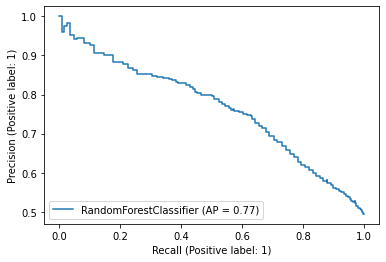

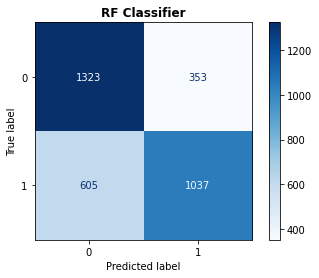

In [160]:
# Obtain the predicted labels for the test dataset
y_pred= best_rf.predict(X_test_dn)
pr_log = plot_precision_recall_curve(best_rf, X_test_dn, y_test_dn)

# Obtain the precision recall curve and confusion matrix
cm = confusion_matrix(y_test_dn, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("RF Classifier", fontweight= "bold")
plt.show()

In [161]:
# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["RF dn-Sample ", accuracy_score(y_test_dn, predictions),
           metrics.precision_score(y_test_dn, predictions),
           metrics.recall_score(y_test_dn, predictions), 
           metrics.f1_score(y_test_dn, predictions), grid_rf.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

              Model  Accuracy  Precision    Recall  F1 Score        CV
0    LR DownSample   0.661242   0.660074  0.650426  0.655215  0.723674
1     LR Up-Sample   0.667351   0.679629  0.637899  0.658103  0.724603
2   LR SMOT-Sample   0.718798   0.721935  0.715163  0.718533  0.793072
3  KNN SMOT-Sample   0.750728   0.751149  0.752686  0.751917  0.825149
4    KNN up-Sample   0.829396   0.826417  0.835579  0.830973  0.845919
5    KNN dn-Sample   0.672092   0.688179  0.616931  0.650610  0.726974
6     DT dn-Sample   0.690175   0.766031  0.538368  0.632332  0.750513
7     DT up-Sample   0.731981   0.760787  0.679686  0.717953  0.794673
8   DT smot-Sample   0.749444   0.764314  0.724032  0.743628  0.819117
9     RF dn-Sample   0.711272   0.746043  0.631547  0.684037  0.766432


# RF - up

RandomForestClassifier()
Cross-validated best score 96.401%
Test score: 90.735%


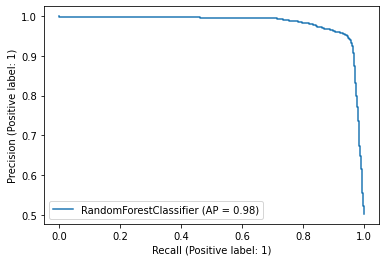

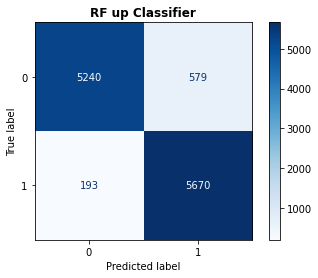

               Model  Accuracy  Precision    Recall  F1 Score        CV
0     LR DownSample   0.661242   0.660074  0.650426  0.655215  0.723674
1      LR Up-Sample   0.667351   0.679629  0.637899  0.658103  0.724603
2    LR SMOT-Sample   0.718798   0.721935  0.715163  0.718533  0.793072
3   KNN SMOT-Sample   0.750728   0.751149  0.752686  0.751917  0.825149
4     KNN up-Sample   0.829396   0.826417  0.835579  0.830973  0.845919
5     KNN dn-Sample   0.672092   0.688179  0.616931  0.650610  0.726974
6      DT dn-Sample   0.690175   0.766031  0.538368  0.632332  0.750513
7      DT up-Sample   0.731981   0.760787  0.679686  0.717953  0.794673
8    DT smot-Sample   0.749444   0.764314  0.724032  0.743628  0.819117
9      RF dn-Sample   0.711272   0.746043  0.631547  0.684037  0.766432
10     RF up-Sample   0.933915   0.907345  0.967082  0.936262  0.964009


In [162]:
# Define the parameter grid and fit the model
param_grid = {'n_estimators':[10,50,100]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1)
grid_rf.fit(X_train_up, y_train_up)
best_rf = grid_rf.best_estimator_
print(best_rf)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_rf.best_score_ * 100, 3)))
predictions = best_rf.predict(X_test_up)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_up, y_pred = predictions) * 100, 3)))


# Obtain the predicted labels for the test dataset
y_pred= best_rf.predict(X_test_up)
pr_log = plot_precision_recall_curve(best_rf, X_test_up, y_test_up)

# Obtain the precision recall curve and confusion matrix
cm = confusion_matrix(y_test_up, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("RF up Classifier", fontweight= "bold")
plt.show()


# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["RF up-Sample ", accuracy_score(y_test_up, predictions),
           metrics.precision_score(y_test_up, predictions),
           metrics.recall_score(y_test_up, predictions), 
           metrics.f1_score(y_test_up, predictions), grid_rf.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

# RF SMOT

RandomForestClassifier()
Cross-validated best score 91.051%
Test score: 85.763%


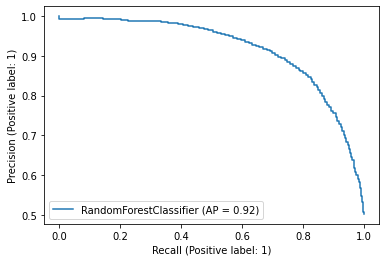

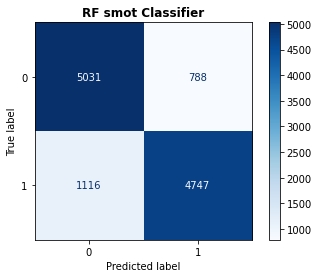

               Model  Accuracy  Precision    Recall  F1 Score        CV
0     LR DownSample   0.661242   0.660074  0.650426  0.655215  0.723674
1      LR Up-Sample   0.667351   0.679629  0.637899  0.658103  0.724603
2    LR SMOT-Sample   0.718798   0.721935  0.715163  0.718533  0.793072
3   KNN SMOT-Sample   0.750728   0.751149  0.752686  0.751917  0.825149
4     KNN up-Sample   0.829396   0.826417  0.835579  0.830973  0.845919
5     KNN dn-Sample   0.672092   0.688179  0.616931  0.650610  0.726974
6      DT dn-Sample   0.690175   0.766031  0.538368  0.632332  0.750513
7      DT up-Sample   0.731981   0.760787  0.679686  0.717953  0.794673
8    DT smot-Sample   0.749444   0.764314  0.724032  0.743628  0.819117
9      RF dn-Sample   0.711272   0.746043  0.631547  0.684037  0.766432
10     RF up-Sample   0.933915   0.907345  0.967082  0.936262  0.964009
11   RF smot-Sample   0.837014   0.857633  0.809654  0.832953  0.910509


In [163]:
# RF - SMOT

# Define the parameter grid and fit the model
param_grid = {'n_estimators':[10,50,100]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1)
grid_rf.fit(X_train_smot, y_train_smot)
best_rf = grid_rf.best_estimator_
print(best_rf)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_rf.best_score_ * 100, 3)))
predictions = best_rf.predict(X_test_smot)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_smot, y_pred = predictions) * 100, 3)))


# Obtain the predicted labels for the test dataset
y_pred= best_rf.predict(X_test_smot)
pr_log = plot_precision_recall_curve(best_rf, X_test_smot, y_test_smot)

# Obtain the precision recall curve and confusion matrix
cm = confusion_matrix(y_test_smot, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("RF smot Classifier", fontweight= "bold")
plt.show()


# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["RF smot-Sample ", accuracy_score(y_test_smot, predictions),
           metrics.precision_score(y_test_smot, predictions),
           metrics.recall_score(y_test_smot, predictions), 
           metrics.f1_score(y_test_smot, predictions), grid_rf.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)